# MNIST 

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline  
print ("packs loaded")

packs loaded


# Download and Extract MNIST dataset

In [10]:
print ("Download and Extract MNIST dataset")
# mnist = input_data.read_data_sets('data/', one_hot=True)
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print
print (" tpye of 'mnist' is %s" % (type(mnist)))
print (" number of trian data is %d" % (len(x_train)))
print (" number of test data is %d" % (len(x_test)))

Download and Extract MNIST dataset
 tpye of 'mnist' is <class 'module'>
 number of trian data is 60000
 number of test data is 10000


## One hot encoding

### Using numpy

In [24]:
def OnehotEncoding(target):
    num = np.unique(target, axis=0)
    num = num.shape[0]
    encoding = np.eye(num)[target]
    return encoding

### Using scikitLearn

In [21]:
def OnehotEncoding(target):
    from sklearn.preprocessing import OneHotEncoder
    target_re = target.reshape(-1,1)
    enc = OneHotEncoder()
    enc.fit(target_re)
    return enc.transform(target_re).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [25]:
# What does the data of MNIST look like? 
print ("What does the data of MNIST look like?")
trainimg   = x_train
trainlabel = OnehotEncoding(y_train)
testimg    = x_test
testlabel  = OnehotEncoding(y_test)
print
print (" type of 'trainimg' is %s"    % (type(trainimg)))
print (" type of 'trainlabel' is %s"  % (type(trainlabel)))
print (" type of 'testimg' is %s"     % (type(testimg)))
print (" type of 'testlabel' is %s"   % (type(testlabel)))
print (" shape of 'trainimg' is %s"   % (trainimg.shape,))
print (" shape of 'trainlabel' is %s" % (trainlabel.shape,))
print (" shape of 'testimg' is %s"    % (testimg.shape,))
print (" shape of 'testlabel' is %s"  % (testlabel.shape,))

What does the data of MNIST look like?
 type of 'trainimg' is <class 'numpy.ndarray'>
 type of 'trainlabel' is <class 'numpy.ndarray'>
 type of 'testimg' is <class 'numpy.ndarray'>
 type of 'testlabel' is <class 'numpy.ndarray'>
 shape of 'trainimg' is (60000, 28, 28)
 shape of 'trainlabel' is (60000, 10)
 shape of 'testimg' is (10000, 28, 28)
 shape of 'testlabel' is (10000, 10)


How does the training data look like?
36688th Training Data Label is 7
25808th Training Data Label is 7
11433th Training Data Label is 1
49026th Training Data Label is 6
29046th Training Data Label is 4


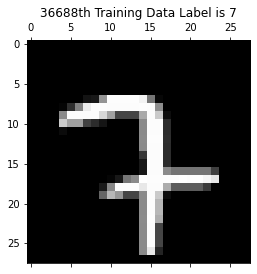

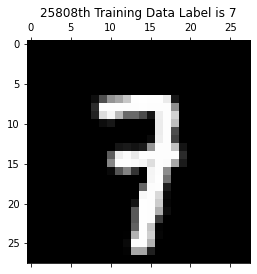

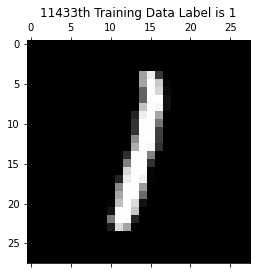

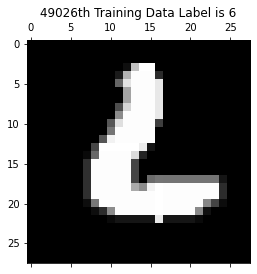

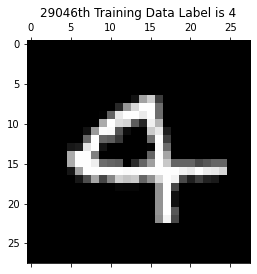

In [26]:
# How does the training data look like?
print ("How does the training data look like?")
nsample = 5
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i) + "th Training Data " 
              + "Label is " + str(curr_label))
    print ("" + str(i) + "th Training Data " 
           + "Label is " + str(curr_label))

## Make Batch with tensorflow dataset

In [4]:
# Batch Learning? 
import tensorflow_datasets as tfds
print ("Batch Learning? ")
batch_size = 100

dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

train_dataset=train_dataset.shuffle(num_train_examples,reshuffle_each_iteration=True)

batch_xs=tf.compat.v1.data.make_one_shot_iterator(train_dataset.batch(batch_size)).get_next()[0].numpy()
batch_ys=tf.compat.v1.data.make_one_shot_iterator(test_dataset.batch(batch_size)).get_next()[0].numpy()
# batch_xs=train_dataset.batch(batch_size).make_one_shot_iterator().get_next()[0].numpy()
# batch_ys=test_dataset.batch(batch_size).make_one_shot_iterator().get_next()[0].numpy()


# batch_xs, batch_ys = mnist.train.next_batch(batch_size)
print ("type of 'batch_xs' is %s" % (type(batch_xs)))
print ("type of 'batch_ys' is %s" % (type(batch_ys)))
print ("shape of 'batch_xs' is %s" % (batch_xs.shape,))
print ("shape of 'batch_ys' is %s" % (batch_ys.shape,))

Batch Learning? 
Number of training examples: 60000
Number of test examples:     10000
type of 'batch_xs' is <class 'numpy.ndarray'>
type of 'batch_ys' is <class 'numpy.ndarray'>
shape of 'batch_xs' is (100, 28, 28, 1)
shape of 'batch_ys' is (100, 28, 28, 1)


In [33]:
# Get Random Batch with 'np.random.randint'
print ("5. Get Random Batch with 'np.random.randint'")
randidx   = np.random.randint(trainimg.shape[0], size=batch_size)
batch_xs2 = trainimg[randidx, :]
batch_ys2 = trainlabel[randidx, :]
print ("type of 'batch_xs2' is %s" % (type(batch_xs2)))
print ("type of 'batch_ys2' is %s" % (type(batch_ys2)))
print ("shape of 'batch_xs2' is %s" % (batch_xs2.shape,))
print ("shape of 'batch_ys2' is %s" % (batch_ys2.shape,))

5. Get Random Batch with 'np.random.randint'
type of 'batch_xs2' is <class 'numpy.ndarray'>
type of 'batch_ys2' is <class 'numpy.ndarray'>
shape of 'batch_xs2' is (100, 28, 28)
shape of 'batch_ys2' is (100, 10)


In [36]:
np.random.permutation(trainimg)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [34]:
randidx

array([12934,  2769, 50045, 37789, 37981, 38790, 53528, 37216, 53119,
       52971, 46566,  7974, 36728, 53238, 15862, 28394,  5584, 25637,
       52076, 55495, 56022, 17189,  5323,  2283, 14352, 51873, 54949,
       19631, 43019, 11042, 35315, 12261, 42377, 44416, 25953, 53051,
       53359, 23886,  5207, 41341, 20158, 57409, 55499, 45941,  5471,
        7067, 40565, 53173,  8752, 11772, 47619, 21225, 32129, 17649,
       16413, 52734, 58342, 33530,  7645, 10503,  1993,  3414, 48967,
       46474, 34070,  5949, 45945,  7501, 59172, 32213, 25841, 16824,
       28802,  8782, 34443, 57132, 22066, 38574, 58713, 45604, 56794,
       27724,  2148,  5247, 19038, 55287, 22443, 22808, 22271, 10820,
       53786, 14943,  5075,  2143,  5070, 27087,  9338, 39561, 50854,
        8595])